In [ ]:
import json
import numpy as np
import hdbscan
from PIL import Image
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
import itertools
import traceback
from functools import partial
from copy import deepcopy
# library imports
from importlib import reload
from copy import deepcopy
from Classes import ClusterObj, BlockObj, ScanDataObj
from Classes.ScanDataObj import update_scan_data_dict
from Functions import CommonFunctions, ClassesFunctions
import pickle
import pandas as pd
reload(CommonFunctions)
reload(ClassesFunctions)
reload(ClusterObj)
reload(BlockObj)
reload(ScanDataObj)


# circle finding:
preprocess_params = {
     'blur_kernel_size': 9,
     'contrast_thr': 650,
     'canny_edge_thr1': 100, # higher = fewer circles
     'canny_edge_thr2': 80  # higher = fewer circles
}

hough_params = {
    'method_name': 'Hough',
    'dp':1.2,
    'minDist':40,
    'param1':11,
    'param2':10,
    'minRadius':12,
    'maxRadius':22,
}

box_path = "/Users/afarinaqs/Library/CloudStorage/Box-Box/Home Folder aa714/Private/"
folder_path = "BME LAB/Afi/OOD Detection/Data/"
folder_name='P24-1204'
input_file_name = 'Day1_S1_N7_OF_5um'
path_no_name = box_path + folder_path + folder_name + '/'
file_path = path_no_name + '/' + input_file_name + '.tif'

image, scaled_image = CommonFunctions.load_image(input_path=file_path, debug=False, plot_images=False)


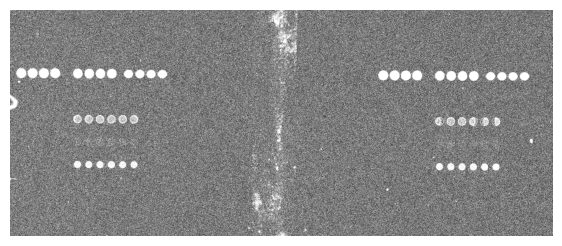

In [142]:
test_image = deepcopy(image)[11200:12200,100:2500] #(y,x)
CommonFunctions.display_in_console(test_image)
test_sorted_circles = CommonFunctions.circle_detection(
    input_image=test_image,
    detection_params=hough_params,
    preprocess_params=preprocess_params,
    debug=False,
    plot_images=False
)

In [143]:
def distance_metric(circle1, circle2, params):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2
    # The default and right way of printing is horizantal! -> distance = dx^3 + dy^5
    if 'x_power' not in params:
        params['x_power'] = 3
    if 'y_power' not in params:
        params['y_power'] = 5

    cost = np.sqrt(np.abs(np.abs(x1 - x2) ** params['x_power'] + np.abs(y1 - y2) ** params['y_power']))
    return cost

metric_params = {
    'x_power': 3,
    'y_power': 5,
}
custom_metric = partial(distance_metric, params=metric_params)


In [144]:
# clustering_model = hdbscan.HDBSCAN(
#     algorithm='best', alpha=1.5, approx_min_span_tree=0,
#     gen_min_span_tree=True, leaf_size=40,
#     metric=lambda p1, p2: custom_exponential_metric(p1, p2, x_power=3, y_power=5),
#     cluster_selection_epsilon=0.9,
#     min_cluster_size=2, min_samples=4, p=None
# )
# sorted_circles = np.vstack(sorted_circles).astype(np.float64)
# predicted_clusters_ids = clustering_model.fit_predict(sorted_circles)
# x_weight = 1.0
# y_weight = 2.0
# scaled_data = sorted_circles.copy()
# scaled_data[:, 1] *= y_weight  # Scale y values

# Fit HDBSCAN
# predicted_clusters_ids = clustering_model.fit_predict(sorted_circles[:, :2])
def custom_exponential_metric(p1, p2, x_power=2, y_power=1.5):
    x1, y1 = p1
    x2, y2 = p2
    return np.sqrt(np.abs((x1 - x2) ** x_power + (y1 - y2) ** y_power))



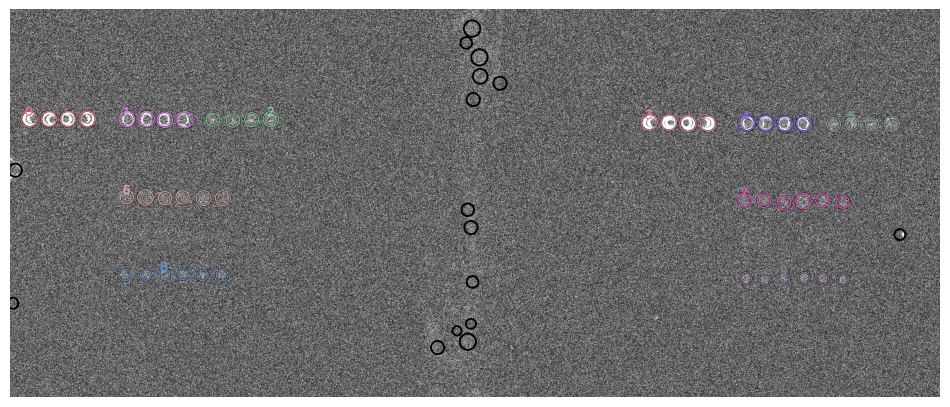

In [145]:
def distance_metric(circle1, circle2, params):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2
    cost = np.sqrt(np.abs(np.abs(x1 - x2) ** params['x_power'] + np.abs(y1 - y2) ** params['y_power']- (y1+y2)**1))
    return cost
metric_params = {'x_power': 3,'y_power': 5,}
custom_metric = partial(distance_metric, params=metric_params)
sorted_circles = deepcopy(test_sorted_circles)
clustering_model = DBSCAN(eps=600, min_samples=3, metric=custom_metric)
predicted_clusters_ids = clustering_model.fit_predict(sorted_circles)
total_found_circles = len(sorted_circles)
clustered_circles = predicted_clusters_ids[predicted_clusters_ids != -1]
unique_cluster_ids = np.unique(clustered_circles)
performance = 100 * len(clustered_circles) / total_found_circles
colored_image = CommonFunctions.make_3D_image(test_image)
clusters_ids_list = []
plot_coords = [np.inf, np.inf, 0, 0]
for index, cluster_id in enumerate(predicted_clusters_ids):
    spot_coords = [int(x) for x in sorted_circles[index]]
    x, y, r = spot_coords
    cv2.circle(colored_image, (x, y), r, (0, 0, 0), 3)
    if cluster_id == -1:
        continue
    color = CommonFunctions.give_me_color_for_cluster_id(cluster_id)
    cv2.circle(colored_image, (x, y), r, color, 2)
    if cluster_id not in clusters_ids_list:
        text_size = cv2.getTextSize(str(cluster_id), cv2.FONT_HERSHEY_SIMPLEX, 0.1, 1)[0]
        text_x = max(x, 25) - text_size[0] // 2 - 10
        text_y = max(y, 25) + text_size[1] // 2 - 10

        cv2.putText(colored_image, str(cluster_id), (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX,
                    1, color, 2, cv2.LINE_AA)
        clusters_ids_list.append(cluster_id)
CommonFunctions.display_in_console(colored_image, plot_images=1, fig_size=[12, 12])




In [79]:
# scaled_data

In [431]:
from lib2to3.fixer_util import Comma
from scipy import ndimage
import pandas as pd
from Functions import CommonFunctions
from importlib import reload

from Functions.ClassesFunctions import measure_signal_of_blocks
from Functions.CommonFunctions import find_circles_with_hough_transform

reload(CommonFunctions)
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import cv2

<class 'numpy.ndarray'>, uint16, shape:(14392, 4390), 3 - 65535 [avg:387.61553104356886]
<class 'numpy.ndarray'>, uint16, shape:(750, 700), 5 - 65535 [avg:973.5139695238096]


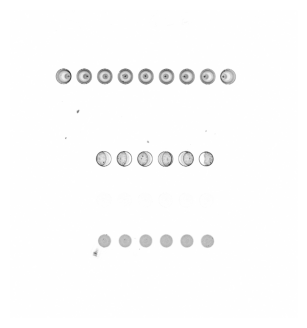

In [500]:
box_path = "/Users/afarinaqs/Library/CloudStorage/Box-Box/Home Folder aa714/Private/"
folder_path = "BME LAB/Afi/OOD Detection/Data/"
folder_name='P1204'
file_name='Day1_S2_N1_SD4_5um'
path = box_path + folder_path + folder_name + '/' + file_name +'.tif'
in_image = cv2.imread(path, cv2.IMREAD_UNCHANGED)

def print_info(im):
    print(f'{type(im)}, {im.dtype}, shape:{im.shape}, {np.min(im)} - {np.max(im)} [avg:{np.mean(im)}]')
print_info(in_image)
in_image = in_image[150:900, 400:1100] #y,x
if np.min(in_image) == 0:
    in_image[in_image == 0] = 1
img = in_image.copy()
in_img = in_image.copy()
print_info(in_img)
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap='gray_r', vmin=5, vmax=65535)
plt.axis('off')
plt.show()

In [441]:
def plot_this(input_image,size=5):
    print_info(input_image)
    plt.figure(figsize=(size, size))
    plt.imshow(input_image, cmap='gray_r', vmin=0, vmax=np.max(input_image))
    plt.axis('off')
    plt.show()

def image_preprocessing(input_image, params=None, debug=False, plot_images=False):
    if not params:
        params = {'blur_kernel_size': 7, 'contrast_thr': 800}
    output_image = deepcopy(input_image)

    # Contrast Thresholding
    if params['contrast_thr']:
        ret, output_image = cv2.threshold(output_image, params['contrast_thr'], 255, 1)
        output_image = output_image.astype(np.uint8)

    # Blurring
    if params['blur_kernel_size']:
        output_image = cv2.GaussianBlur(output_image, (params['blur_kernel_size'], params['blur_kernel_size']), 0)

    if np.min(output_image) == 0:
        output_image[output_image == 0] = 1
    return output_image


<class 'numpy.ndarray'>, uint8, shape:(750, 700), 1 - 255 [avg:(750, 700)]


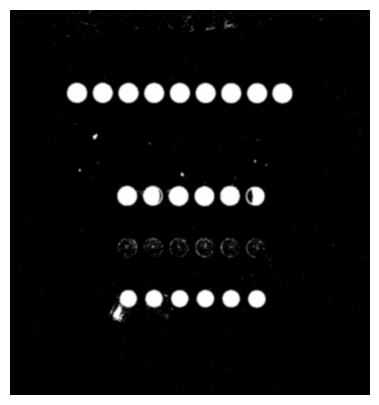

In [442]:
processed_image = image_preprocessing(img)
plot_this(processed_image)

<class 'numpy.ndarray'>, uint8, shape:(750, 700), 0 - 255 [avg:(750, 700)]


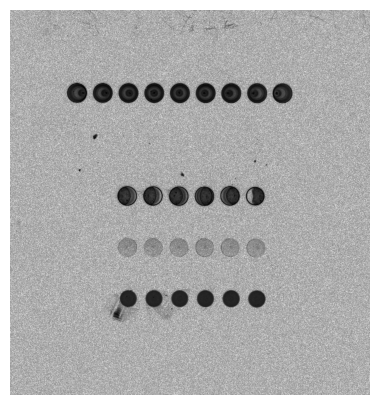

In [443]:
scaled_img = cv2.normalize(np.log10(img), None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plot_this(scaled_img)

In [444]:
def find_circles_with_hough_transform(input_image, hparams=None):
    if not hparams:
        hparams = {'dp': 1.2, 'minDist': 40, 'param1': 11, 'param2': 10, 'minRadius': 12, 'maxRadius': 22,}
    circles = cv2.HoughCircles(
        input_image,
        cv2.HOUGH_GRADIENT,
        dp=hparams['dp'],
        minDist=hparams['minDist'],
        param1=hparams['param1'],
        param2=hparams['param2'],
        minRadius=hparams['minRadius'],
        maxRadius=hparams['maxRadius']
    )

    circles = np.uint16(np.around(circles))  # [center_x, center_y, radius]
    circles = circles[0]
    print(f'** Detected total of {len(circles)} circles')
    sorted_indices = np.lexsort((circles[:, 0], circles[:, 1]))
    sorted_circles = circles[sorted_indices]
    sorted_circles = [np.append(item[:-1], item[-1]) for item in sorted_circles]
    print(f'found {len(sorted_circles)} circles with cv2.HoughCircles')
    return sorted_circles

def show_circles_on_plot(input_image, circles_vec=None):
    print_info(input_image)
    # img = np.log10(input_image)
    temp_plot_image = np.stack((deepcopy(input_image),) * 3, axis=-1).astype(np.uint8)
    temp_plot_image = cv2.normalize(temp_plot_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    for x, y, r in circles_vec:
        cv2.circle(temp_plot_image, (x, y), r, (255, 0, 255), 1)
    # plot_amigos([input_image, temp_plot_image)
    return temp_plot_image

def plot_amigos(images, size=3):
    fig, axes = plt.subplots(1, len(images), figsize=(size*3, size*3))
    for ax, img in zip(axes.flat, images):
        print_info(img)
        ax.imshow(img, cmap='gray', vmin=0, vmax=np.max(img))
        ax.axis('off')  # Turn off the axis
    plt.tight_layout()
    plt.show()


In [445]:
def measure_signal(input_image, circles_vec):
    image = deepcopy(input_image)
    neg_fg_mask = np.ones(image.shape)
    mean_bg_list = []
    mean_fg_list = []
    for x,y,z in circles_vec:
        cv2.circle(neg_fg_mask, (x, y), r, 0, thickness=-1) #making the neg_fg_mask

        # background
        spot_bg = np.zeros(image.shape)
        cv2.circle(spot_bg, (x, y), round(r * 4), 1, thickness=-1)  # creating a big white circle around 1 spot
        spot_bg = np.logical_and(spot_bg, neg_fg_mask)  # remove the fg + margin of all spots in block
        bg_label, _ = ndimage.label(spot_bg)
        bg_mean = ndimage.median(image, bg_label)
        mean_bg_list.append(bg_mean)

        # foreground
        spot_fg = np.zeros(image.shape)
        cv2.circle(spot_fg, (x, y), r, 1, thickness=-1)
        fg_label, _ = ndimage.label(spot_fg)
        fg_mean = ndimage.mean(image, fg_label)
        if fg_mean < 300:
            continue
        mean_fg_list.append(fg_mean)
        # plot_amigos([fg_label, bg_label], size=3)
    return np.mean(mean_fg_list)

# plot_this(a)

In [446]:
# #custom preprocess:
# img = deepcopy(in_image).astype(np.uint8)
# output_image = deepcopy(in_image)
#
# params = {'blur_kernel_size': 5, 'contrast_thr': 500, }
# if np.min(output_image) == 0:
#     output_image[output_image == 0] = 1
# output_image = cv2.GaussianBlur(output_image, (params['blur_kernel_size'], params['blur_kernel_size']), 0)
#
# ret, output_image = cv2.threshold(output_image, params['contrast_thr'], 255, 1)
# print(ret)
# output_image = output_image.astype(np.uint8)
# print(np.min(output_image), np.max(output_image))
# print(np.min(img), np.max(img))
# th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,111,2)
# th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,55)
# plot_amigos(images=[img, th2, th3],size=3)
#
# if np.min(output_image) == 0:
#     output_image[output_image == 0] = 1
# # plot_this(output_image)
#
# params = {'canny_edge_thr1': 20, 'canny_edge_thr2': 20}
# canny_img = cv2.Canny(output_image, threshold1=params['canny_edge_thr1'], threshold2=params['canny_edge_thr2'])
# canny_circles = find_circles_with_hough_transform(canny_img)
# canny_c_img = show_circles_on_plot(scaled_img, circles_vec=canny_circles)
# print(f'*** VALUE: {measure_signal(img, canny_circles):.0f} ***')
# plot_amigos(images=[img, canny_img, canny_c_img],size=3)

canny:
** Detected total of 33 circles
found 33 circles with cv2.HoughCircles
<class 'numpy.ndarray'> uint8 (750, 700) 0 255
*** VALUE: 13766 ***
<class 'numpy.ndarray'> uint16 (750, 700) 973.5139695238096 5 65535
<class 'numpy.ndarray'> uint8 (750, 700) 2.549514285714286 0 255
<class 'numpy.ndarray'> uint8 (750, 700, 3) 88.09395238095239 0 255


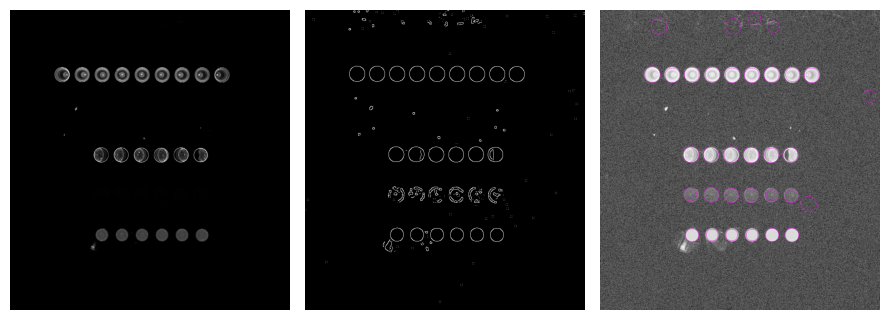

In [447]:
# Canny Edge Detection
print('canny:')
pparams = {'blur_kernel_size': 13, 'contrast_thr': 1000, }
processed_image2 = image_preprocessing(img, pparams)
params = {'canny_edge_thr1': 20, 'canny_edge_thr2': 20}
canny_img = cv2.Canny(processed_image2, threshold1=params['canny_edge_thr1'], threshold2=params['canny_edge_thr2'])
canny_circles = find_circles_with_hough_transform(canny_img)
canny_c_img = show_circles_on_plot(scaled_img, circles_vec=canny_circles)
print(f'*** VALUE: {measure_signal(img, canny_circles):.0f} ***')
plot_amigos(images=[img, canny_img, canny_c_img],size=3)


prewitt:
** Detected total of 27 circles
found 27 circles with cv2.HoughCircles
<class 'numpy.ndarray'> uint8 (750, 700) 0 255
*** VALUE: 13539 ***
<class 'numpy.ndarray'> uint16 (750, 700) 973.5139695238096 5 65535
<class 'numpy.ndarray'> uint8 (750, 700) 4.390022857142857 0 255
<class 'numpy.ndarray'> uint8 (750, 700, 3) 88.15931809523809 0 255


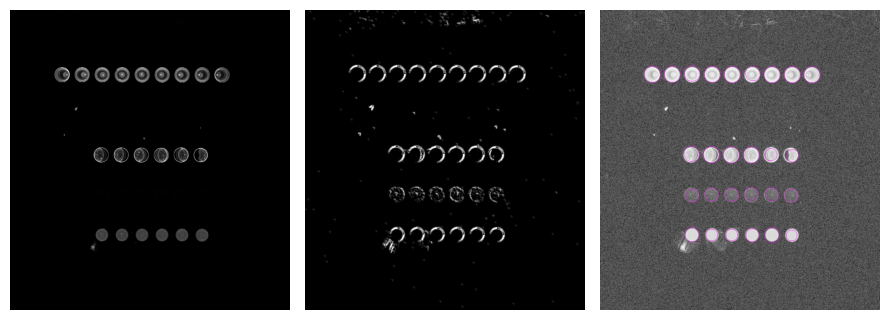

In [448]:
print('prewitt:')
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewittx = cv2.filter2D(processed_image,-1,kernelx)
prewitty = cv2.filter2D(processed_image,-1,kernely)
prewitty_img = prewitty+prewittx
# plot_this(prewittxy)
hparams = {'dp': 1.2, 'minDist': 40, 'param1':11, 'param2': 20, 'minRadius': 12, 'maxRadius': 22,}
prewitty_circles = find_circles_with_hough_transform(input_image=prewitty_img, hparams=hparams)
prewitty_c_img = show_circles_on_plot(scaled_img, circles_vec=prewitty_circles)
print(f'*** VALUE: {measure_signal(img, prewitty_circles):.0f} ***')
plot_amigos(images=[img, prewitty_img, prewitty_c_img],size=3)

In [166]:
# df.mean().plot(kind='bar')

sobel:
** Detected total of 29 circles
found 29 circles with cv2.HoughCircles
<class 'numpy.ndarray'> uint8 (750, 700) 0 255
*** VALUE: 13542 ***
<class 'numpy.ndarray'> uint16 (750, 700) 973.5139695238096 5 65535
<class 'numpy.ndarray'> uint8 (750, 700) 17.370024761904762 0 255
<class 'numpy.ndarray'> uint8 (750, 700, 3) 88.2886380952381 0 255


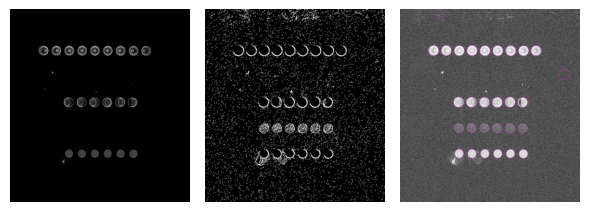

<class 'numpy.ndarray'> uint8 (750, 700, 3) 88.09395238095239 0 255
<class 'numpy.ndarray'> uint8 (750, 700, 3) 88.15931809523809 0 255
<class 'numpy.ndarray'> uint8 (750, 700, 3) 88.2886380952381 0 255


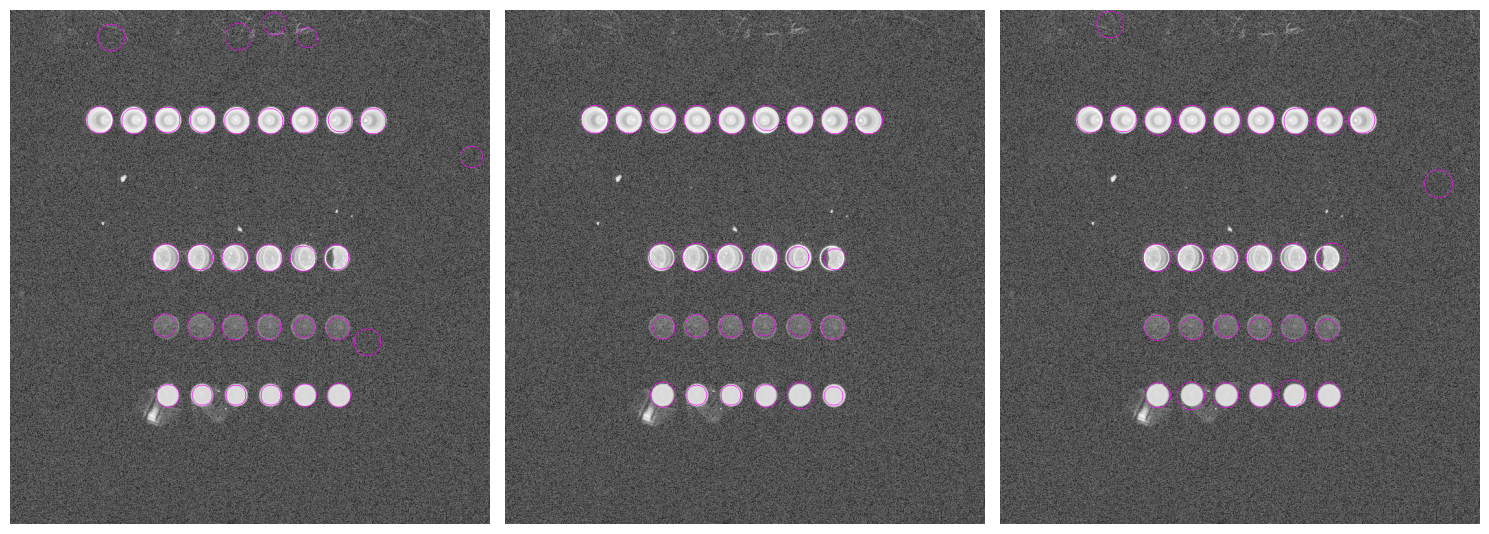

In [449]:
print('sobel:')
pparams = {'blur_kernel_size': 3, 'contrast_thr': 470,}
processed_image2 = image_preprocessing(img, pparams)
sobelx = cv2.Sobel(processed_image2, -1,1,0,ksize=3)
sobely = cv2.Sobel(processed_image2, -1,0,1,ksize=3)
sobel_img = sobelx+sobely
sobel_img = sobel_img - np.min(sobel_img)
# plot_this(sobel_img)
hparams = {'dp': 1.2, 'minDist': 40, 'param1':11, 'param2': 20, 'minRadius': 12, 'maxRadius': 22,}
sobel_circles = find_circles_with_hough_transform(input_image=sobel_img, hparams=hparams)
sobel_c_img = show_circles_on_plot(scaled_img, circles_vec=sobel_circles)
print(f'*** VALUE: {measure_signal(img, sobel_circles):.0f} ***')
plot_amigos(images=[img, sobel_img, sobel_c_img],size=2)
plot_amigos(images=[canny_c_img, prewitty_c_img, sobel_c_img],size=5)


<class 'numpy.ndarray'>, uint8, shape:(750, 700), 0 - 255 [avg:(750, 700)]


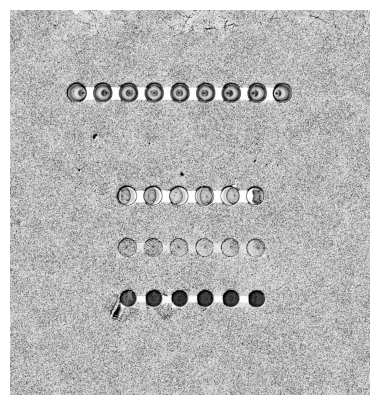

In [450]:
# Get local maximum:
kernelSize = 20
maxKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
localMax = cv2.morphologyEx(in_image, cv2.MORPH_CLOSE, maxKernel, None, None, 1, cv2.BORDER_REFLECT101)
# Perform gain division
gainDivision = np.where(localMax == 0, 0, (image / localMax))
# Clip the values to [0,255]
gainDivision = np.clip((255 * gainDivision), 0, 255)
# Convert the mat type from float to uint8:
gainDivision = gainDivision.astype("uint8")
plot_this(gainDivision)

<class 'numpy.ndarray'>, uint8, shape:(750, 700, 3), 0 - 255 [avg:(750, 700, 3)]


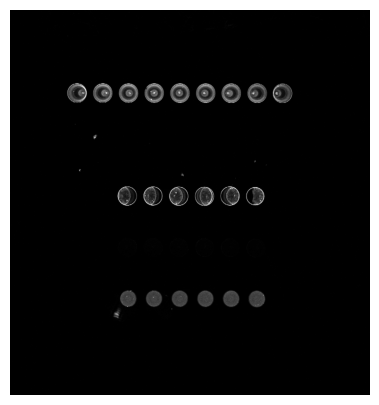

<class 'numpy.ndarray'>, uint8, shape:(750, 700, 3), 1 - 255 [avg:(750, 700, 3)]


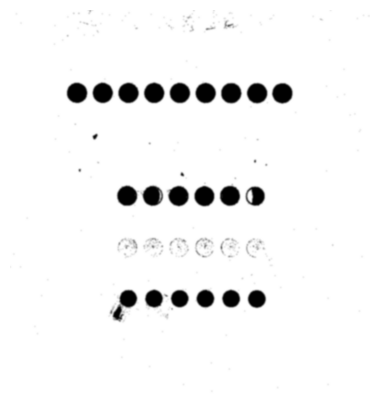

In [451]:
simg = cv2.normalize(deepcopy(in_img), None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
d3img = np.stack((deepcopy(simg),) * 3, axis=2)
pd3img = np.stack((deepcopy(processed_image),) * 3, axis=-1).astype(np.uint8)
plot_this(d3img)
plot_this(pd3img)

mean_pixel_values: [3.71639048 3.71639048 3.71639048]
<class 'numpy.ndarray'>, uint8, shape:(750, 700), 0 - 246 [avg:11.01123619047619]
<class 'numpy.ndarray'> float32 (750, 700) -70.89852 -73.5 105.0
<class 'numpy.ndarray'> uint8 (750, 700) 183.40332952380953 0 255
<class 'numpy.ndarray'> uint8 (750, 700) 11.01123619047619 0 246


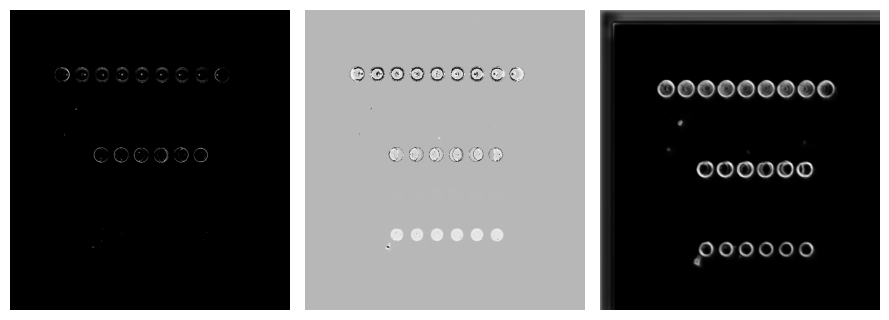

In [624]:
#Import library
import torch
import torchvision
import kornia as ki

def imshow(input: torch.Tensor):
    out = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.ndarray = ki.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()

# The pre-trained model that OpenCV uses has been trained in Caffe framework
#Download from the link above
protoPath = r"Traditional-and-Deeplearning-based-EdgeDetection-master/hed-edge-detector-master/deploy.prototxt"
modelPath = r"Traditional-and-Deeplearning-based-EdgeDetection-master/hed-edge-detector-master/hed_pretrained_bsds.caffemodel"
net = cv2.dnn.readNetFromCaffe(protoPath, modelPath)

img = deepcopy(d3img)
(H, W) = img.shape[:2]

# new_h = (H // 32) * 32
# new_w = (W // 32) * 32
# img = cv2.resize(img, (new_w, new_h))

mean_pixel_values= np.average(img, axis = (0,1))
print(f'mean_pixel_values: {mean_pixel_values}')
blob = cv2.dnn.blobFromImage(img, scalefactor=0.7, size=(W, H),
                             # mean=(mean_pixel_values[0], mean_pixel_values[1], mean_pixel_values[2]+1),
                             mean=(105, 117, 123),
                             swapRB= False, crop=False)
blob_for_plot = np.moveaxis(blob[0,:,:,:], 0,2)
bb = (blob[0,0,:,:] - np.mean(blob)).astype(np.uint8)
net.setInput(blob)
hed = net.forward()
hed = hed[0,0,:,:]  #Drop the other axes
hed = (255 * hed).astype("uint8")  #rescale to 0-255
print_info(hed)
plot_amigos([blob[0,0,:,:], blob_for_plot[:,:,0].astype(np.uint8), hed])


<class 'numpy.ndarray'>, uint8, shape:(950, 900), 0 - 1 [avg:0.5921742690058479]
<class 'numpy.ndarray'>, uint8, shape:(750, 700), 0 - 255 [avg:11.40486857142857]
<class 'numpy.ndarray'> uint8 (950, 900) 0.5921742690058479 0 1
<class 'numpy.ndarray'> uint8 (750, 700) 11.40486857142857 0 255


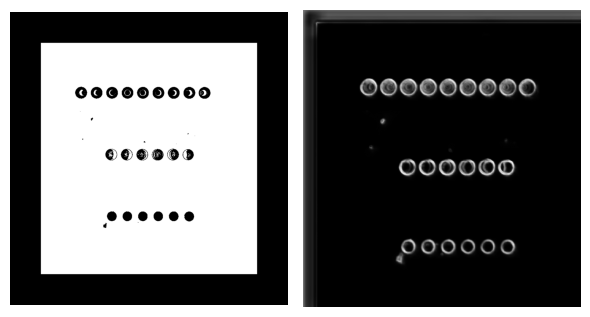

In [644]:
s1 = cv2.normalize(scaled_img.astype(np.uint8), None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
_, s1 = cv2.threshold(s1, 200, 1, 1,cv2.THRESH_BINARY)
ss = s1.copy()
# Pad with zeros: ((top, bottom), (left, right))
p=100
s1 = np.pad(s1, pad_width=((p, p), (p, p)), mode='constant', constant_values=0)

s2 = cv2.normalize(hed, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# _, s2 = cv2.threshold(s2, 80, 1, 1,cv2.THRESH_BINARY)
# s2 = s2[90:700,90:600]

print_info(s1)
print_info(s2)
plot_amigos([s1,s2], size=2)

(18691, 2)
[0 1 2]
161.94565923360034
361.6606086221471
562.7494174962932
[np.float64(161.94565923360034), np.float64(361.6606086221471), np.float64(562.7494174962932)]
Average y-coordinates for each line: [np.float64(161.94565923360034), np.float64(361.6606086221471), np.float64(562.7494174962932)]
<class 'numpy.ndarray'>, uint8, shape:(750, 700), 0 - 255 [avg:86.38454285714286]


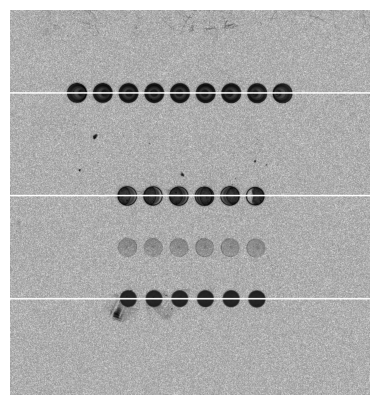

In [641]:
from sklearn.cluster import DBSCAN
_, thresh = cv2.threshold(scaled_img, 200, 255, cv2.THRESH_BINARY)
# plot_this(thresh)
bright_pixels = np.column_stack(np.where(thresh > 0))  # (y, x) coordinates
print(bright_pixels.shape)

clustering = DBSCAN(eps=70, min_samples=3).fit(bright_pixels)
labels = clustering.labels_
print(np.unique(labels))
average_y_coordinates = []
for label in np.unique(labels):
    if label == -1:
        continue  # Skip noise points
    cluster_points = bright_pixels[labels == label]
    avg_y = np.mean(cluster_points[:, 0])
    print(avg_y)# Average of y-coordinates
    average_y_coordinates.append(avg_y)

print(average_y_coordinates)
# Sort the average y-coordinates
average_y_coordinates.sort()

print("Average y-coordinates for each line:", average_y_coordinates)
ss = scaled_img.copy()
for avg_y in average_y_coordinates:
    avg_y = int(avg_y)  # Convert to integer
    cv2.line(ss, (0, avg_y), (ss.shape[1], avg_y), (0, 0, 255), 2)  # Red line, thickness=2

plot_this(ss)

In [652]:
print_info(s2)

<class 'numpy.ndarray'>, uint8, shape:(750, 700), 0 - 255 [avg:11.40486857142857]


(51490, 2)
[0 1 2]
116.52017920337325
261.8328959746497
600.3901923483407
[np.float64(116.52017920337325), np.float64(261.8328959746497), np.float64(600.3901923483407)]
Average y-coordinates for each line: [np.float64(116.52017920337325), np.float64(261.8328959746497), np.float64(600.3901923483407)]
<class 'numpy.ndarray'>, uint8, shape:(750, 700), 0 - 255 [avg:11.312095238095239]


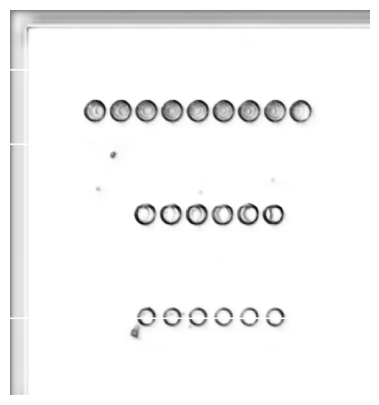

In [658]:
from sklearn.cluster import DBSCAN
_, thresh = cv2.threshold(s2, 40, 255, cv2.THRESH_BINARY)
# plot_this(thresh)
bright_pixels = np.column_stack(np.where(thresh > 0))  # (y, x) coordinates
print(bright_pixels.shape)

clustering = DBSCAN(eps=80, min_samples=3).fit(bright_pixels)
labels = clustering.labels_
print(np.unique(labels))
average_y_coordinates = []
for label in np.unique(labels):
    if label == -1:
        continue  # Skip noise points
    cluster_points = bright_pixels[labels == label]
    avg_y = np.mean(cluster_points[:, 0])
    print(avg_y)# Average of y-coordinates
    average_y_coordinates.append(avg_y)

print(average_y_coordinates)
# Sort the average y-coordinates
average_y_coordinates.sort()

print("Average y-coordinates for each line:", average_y_coordinates)
ss = s2.copy()
for avg_y in average_y_coordinates:
    avg_y = int(avg_y)  # Convert to integer
    cv2.line(ss, (0, avg_y), (ss.shape[1], avg_y), (0, 0, 255), 2)  # Red line, thickness=2

plot_this(ss)

In [685]:
res = cv2.matchTemplate(s2, s1, method=cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(max_loc, max_val)
# Calculate the shift
shift_x, shift_y = max_loc[0], max_loc[1]
print(f"Detected shift: x = {shift_x}, y = {shift_y}")


(200, 200) 0.17204679548740387
Detected shift: x = 200, y = 200


<class 'numpy.ndarray'> uint8 (750, 700) 87.95610095238095 0 255
<class 'numpy.ndarray'> uint8 (750, 700) 0.707255238095238 0 1
<class 'numpy.ndarray'> uint8 (750, 700) 11.01123619047619 0 246


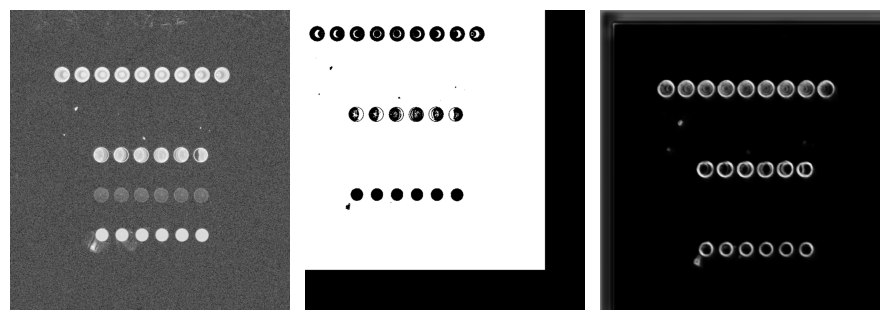

In [690]:
# Create a translation matrix
translation_matrix = np.float32([[1, 0, -shift_x], [0, 1, -shift_y]])

# Apply translation
corrected_output = cv2.warpAffine(s1, translation_matrix, (s2.shape[1], s2.shape[0]))
plot_amigos([scaled_img,corrected_output, hed], size=3)

In [528]:
print_info(scaled_img.astype(np.uint8))

<class 'numpy.ndarray'>, uint8, shape:(750, 700), 0 - 255 [avg:87.95610095238095]


In [454]:
# bb = (blob_for_plot[:,:,0])
# bb = (blob_for_plot[:,:,0] + 3).astype(np.uint8)
# # print(bb.shape,np.min(bb),np.max(bb), type(bb), bb.dtype)
# plot_this(bb)
hed.shape

(750, 700)

In [455]:
bb.shape, blob.shape, blob_for_plot.shape,hed.shape


((750, 700), (1, 3, 750, 700), (750, 700, 3), (750, 700))

<class 'numpy.ndarray'> uint16 (750, 700) 973.5139695238096 5 65535
<class 'numpy.ndarray'> uint8 (750, 700) 213.40375238095237 0 255
<class 'numpy.ndarray'> uint8 (750, 700) 3.333489523809524 2 104
<class 'numpy.ndarray'> uint8 (750, 700) 15.894935238095238 0 224


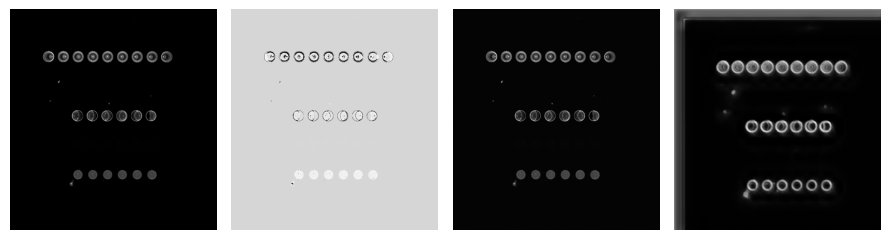

In [461]:
plot_amigos([in_img, blob_for_plot[:,:,0].astype(np.uint8), bb,hed])

(750, 700)
** Detected total of 21 circles
found 21 circles with cv2.HoughCircles
<class 'numpy.ndarray'> uint8 (750, 700) 4 182
** Detected total of 21 circles
found 21 circles with cv2.HoughCircles
<class 'numpy.ndarray'> uint8 (750, 700) 0 246
** Detected total of 23 circles
found 23 circles with cv2.HoughCircles
<class 'numpy.ndarray'> uint8 (750, 700) 1 255
<class 'numpy.ndarray'> uint8 (750, 700, 3) 4.013331428571429 0 255
<class 'numpy.ndarray'> uint8 (750, 700, 3) 11.579059047619047 0 255
<class 'numpy.ndarray'> uint8 (750, 700, 3) 243.3881295238095 0 255


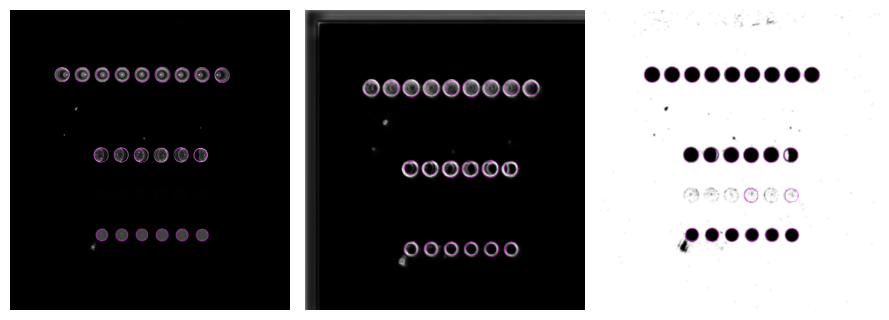

In [674]:
output_list = []
c_list =[]
print(scaled_img.shape)
for template in [bb, hed, processed_image]:
    circles = find_circles_with_hough_transform(template, hparams=hparams)
    c_img = show_circles_on_plot(template, circles_vec=circles)
    # c_img2 = show_circles_on_plot(blob[0,0,:,:].astype(np.uint8), circles_vec=circles)
    c_list.append(circles)
    output_list.append(c_img)

plot_amigos(output_list)

In [700]:
print_info(bb)

<class 'numpy.ndarray'>, uint8, shape:(750, 700), 4 - 182 [avg:6.700281904761905]


In [712]:
hed.shape, shifts

((750, 700), array([33, 36,  1], dtype=uint16))

In [719]:
cs2 = c_list[1]
cs2 = [x - shifts for x in cs2]
cs2[0], c_list[1][0]

(array([482, 158,  18], dtype=uint16), array([515, 194,  19], dtype=uint16))

<class 'numpy.ndarray'> uint8 (750, 700) 0 255
<class 'numpy.ndarray'> uint8 (750, 700) 0 255
<class 'numpy.ndarray'> uint8 (750, 700) 0 255
<class 'numpy.ndarray'> uint8 (750, 700, 3) 87.80334285714285 0 255
<class 'numpy.ndarray'> uint8 (750, 700, 3) 87.97306476190477 0 255
<class 'numpy.ndarray'> uint8 (750, 700, 3) 87.93979047619048 0 255


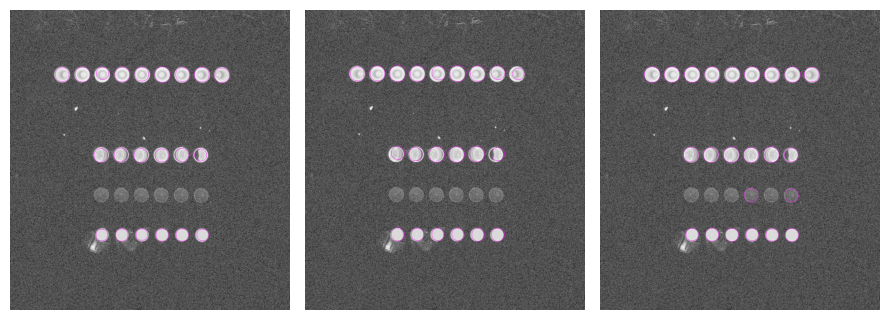

In [720]:
imgs2 = []
for i in range(3):
    cs = c_list[i]
    if i == 1:
        cs = cs2
    imgs2.append(show_circles_on_plot(scaled_img, circles_vec=cs))

plot_amigos(imgs2)


In [703]:
mins = []
imgs = []
origs = [bb, hed, processed_image]
for i in range(3):
    cs = c_list[i]
    imgi = output_list[i]
    coords = (10000, 10000,0)
    for c in cs:
        # print(c)
        if c[0] + c[1] <= coords[0]+coords[1]:
            # print(f'updated from {coords} to {c}')
            coords = c
    mins.append(coords)
    print(coords)
    imgs.append(show_circles_on_plot(scaled_img, circles_vec=[coords]))

plot_amigos(imgs)
# plot_this(imgs[0])
# plot_this(imgs[1])
# plot_amigos(imgs[2])


<class 'numpy.ndarray'>, uint8, shape:(750, 700), 0 - 246 [avg:11.01123619047619]


[33 36  1]
<class 'numpy.ndarray'>, uint8, shape:(717, 664), 0 - 246 [avg:6.715762632118432]
<class 'numpy.ndarray'> uint8 (750, 700) 11.01123619047619 0 246
<class 'numpy.ndarray'> uint8 (750, 700) 6.700281904761905 4 182
<class 'numpy.ndarray'> uint8 (717, 664) 6.715762632118432 0 246


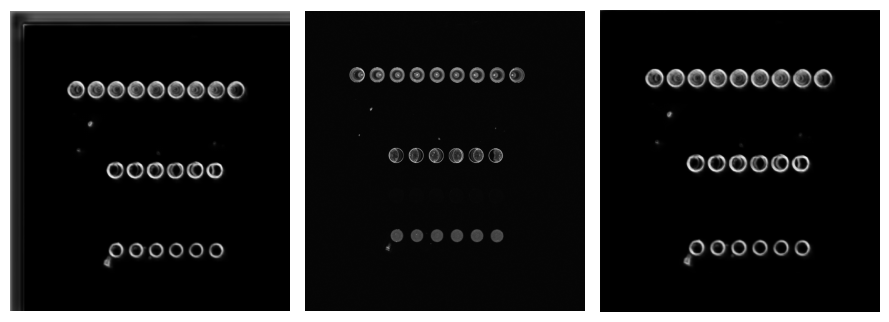

In [707]:
shifts = mins[1]-mins[0]
print(shifts)

corrected_output = hed[shifts[0]:, shifts[1]:]
print_info(corrected_output)

plot_amigos([hed,bb, corrected_output], size=3)

** Detected total of 18 circles
found 18 circles with cv2.HoughCircles
<class 'numpy.ndarray'> uint8 (750, 700) 0 255
<class 'numpy.ndarray'> uint8 (750, 700) 15.894935238095238 0 224
<class 'numpy.ndarray'> uint8 (750, 700, 3) 88.09395238095239 0 255
<class 'numpy.ndarray'> uint8 (750, 700, 3) 87.89770857142857 0 255


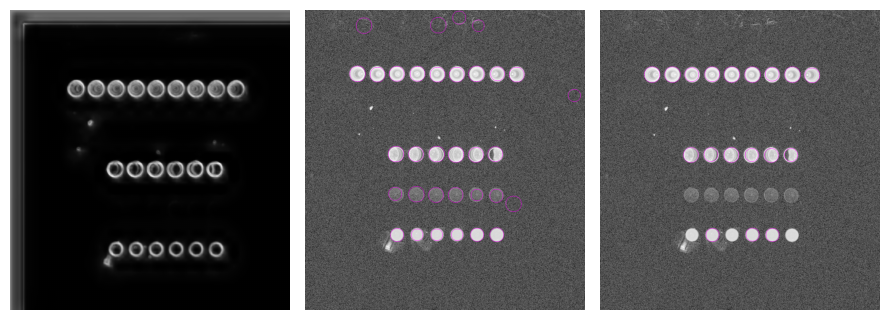

In [466]:
# hparams = {'dp': 1.2, 'minDist': 40, 'param1': 20, 'param2': 20, 'minRadius': 17, 'maxRadius': 25,}
hed_circles = find_circles_with_hough_transform(bb,hparams)
hed_c_img = show_circles_on_plot(scaled_img, circles_vec=hed_circles)
# print(f'*** VALUE: {measure_signal(img, hed_circles):.0f} ***')
plot_amigos(images=[hed, canny_c_img, hed_c_img],size=3)

In [684]:
# import argparse
# import numpy as np
# import skimage.io as io
# import matplotlib.pyplot as plt
# from skimage import color
# from mpl_toolkits.mplot3d import Axes3D
#
#
# def edgesMarrHildreth(img, sigma):
#     """
#             finds the edges using MarrHildreth edge detection method...
#             :param im : input image
#             :param sigma : sigma is the std-deviation and refers to the spread of gaussian
#             :return:
#             a binary edge image...
#     """
#     size = int(2*(np.ceil(3*sigma))+1)
#
#     x, y = np.meshgrid(np.arange(-size/2+1, size/2+1),
#                        np.arange(-size/2+1, size/2+1))
#
#     normal = 1 / (2.0 * np.pi * sigma**2)
#
#     kernel = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * \
#         np.exp(-(x**2+y**2) / (2.0*sigma**2)) / normal  # LoG filter
#
#     kern_size = kernel.shape[0]
#     log = np.zeros_like(img, dtype=float)
#
#     # applying filter
#     for i in range(img.shape[0]-(kern_size-1)):
#         for j in range(img.shape[1]-(kern_size-1)):
#             window = img[i:i+kern_size, j:j+kern_size] * kernel
#             log[i, j] = np.sum(window)
#
#     log = log.astype(np.int64, copy=False)
#
#     zero_crossing = np.zeros_like(log)
#
#     # computing zero crossing
#     for i in range(log.shape[0]-(kern_size-1)):
#         for j in range(log.shape[1]-(kern_size-1)):
#             if log[i][j] == 0:
#                 if (log[i][j-1] < 0 and log[i][j+1] > 0) or (log[i][j-1] < 0 and log[i][j+1] < 0) or (log[i-1][j] < 0 and log[i+1][j] > 0) or (log[i-1][j] > 0 and log[i+1][j] < 0):
#                     zero_crossing[i][j] = 255
#             if log[i][j] < 0:
#                 if (log[i][j-1] > 0) or (log[i][j+1] > 0) or (log[i-1][j] > 0) or (log[i+1][j] > 0):
#                     zero_crossing[i][j] = 255
#     #
#     # # plotting images
#     # fig = plt.figure()
#     # a = fig.add_subplot(1, 2, 1)
#     # imgplot = plt.imshow(log, cmap='gray')
#     # a.set_title('Laplacian of Gaussian')
#     # a = fig.add_subplot(1, 2, 2)
#     # imgplot = plt.imshow(zero_crossing, cmap='gray')
#     # string = 'Zero Crossing sigma = '
#     # string += (str(sigma))
#     # a.set_title(string)
#     # plt.show()
#
#     return log, zero_crossing
#
#
#
# img = deepcopy(in_img)
# # img = color.rgb2gray(img)
#
# log, zero_crossing = edgesMarrHildreth(img, 1.5)
# plot_this(zero_crossing)
# # print(log)
# # print(zero_crossing)

In [683]:
# print_info(zero_crossing)
# plot_this(zero_crossing)

In [682]:
# hparams = {'dp': 1.2, 'minDist': 40, 'param1':11, 'param2': 25, 'minRadius': 15, 'maxRadius': 24,}
# circles = find_circles_with_hough_transform(zero_crossing.astype(np.uint8),hparams)
# c_img = show_circles_on_plot(zero_crossing, circles_vec=circles)
# plot_amigos(images=[in_img,zero_crossing,c_img],size=3)